In [18]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LeakyReLU, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import fashion_mnist

In [3]:
# conda activate py36

In [4]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


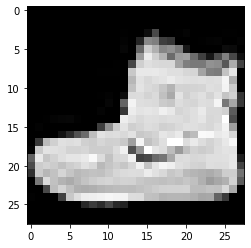

In [7]:
plt.imshow(X_train[0], cmap='gray')

In [33]:
max_rbg_value = 255
width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

X_test = X_test.reshape((X_test.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [42]:
model = Sequential()
nb_classes = 10

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 padding='same',
                 input_shape=(X_train.shape[1], X_train.shape[2], 1)
                 ))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 padding='same'))
          
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))
          
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))

model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=.0001, 
                             decay=1e-5),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [43]:
# Train Model:

nb_epochs = 3
steps_per_epoch = 150
train_batch_size = 256
test_batch_size = 100

history = model.fit(X_train, Y_train,
                   epochs=3,
                   batch_size=256,
                   validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 11754s 196ms/step - loss: 0.3186 - accuracy: 0.8849 - val_loss: 2.6993 - val_accuracy: 0.1051
Epoch 2/3
60000/60000 [==============================] - 2425s 40ms/step - loss: 0.1498 - accuracy: 0.9468 - val_loss: 0.6383 - val_accuracy: 0.7996
Epoch 3/3
60000/60000 [==============================] - 2476s 41ms/step - loss: 0.0733 - accuracy: 0.9758 - val_loss: 0.3136 - val_accuracy: 0.8984


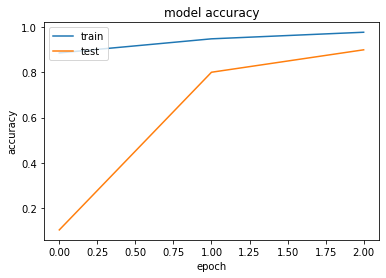

In [44]:
# Plot train history:

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()